## What is Web Scraping? :-
Web Scrapping also called “Crawling” or “Spidering” is the technique to gather data automatically from an online source usually from a website. While Web Scrapping is an easy way to get a large volume of data in a relatively short time frame, it adds stress to the server where the source is hosted.

This is also one of the main reasons why many websites don’t allow scraping all on their website. However, as long as it does not disrupt the primary function of the online source, it is fairly acceptable.

 

## Why Web Scraping? –
There’s a large volume of data lying on the web that people can utilize to serve the business needs.  So, one needs some tool or technique to gather this information from the web. And that’s where the concept of Web-Scrapping comes in to play.

 

## How Web Scraping is useful? –
Web scraping can help us extract an enormous amount of data about customers, products, people, stock markets, etc.

One can utilize the data collected from a website such as e-commerce portal, Job portals, social media channels to understand customer’s buying patterns, employee attrition behavior, and customer’s sentiments and the list goes on.

Most popular libraries or frameworks that are used in Python for Web – Scrapping are BeautifulSoup, Scrappy & Selenium.

In this article, we’ll talk about Web-scrapping using Selenium in Python. And the cherry on top we’ll see how can we gather images from the web that you can use to build train data for your deep learning project.



## What is Selenium: –
Selenium is an open-source web-based automation tool. Selenium primarily used for testing in the industry but It can also be used for web scraping. We’ll use the Chrome browser but you can try on any browser, It’s almost the same.

Now let us see how to use selenium for Web Scraping.



## Setup & tools:-
## Installation:
### Install selenium using pip
    pip install selenium
### Install selenium using conda
    conda install -c conda-forge selenium
## Download Chrome Driver:
To download web drivers, you can choose any of below methods-
### You can either directly download chrome driver from the below link-
https://chromedriver.chromium.org/downloads
### Or, you can download it directly using below line of code-
driver = webdriver.Chrome(ChromeDriverManager().install())

You can find complete documentation on selenium here. Documentation is very much self-explanatory so make sure to read it to leverage selenium with Python.

Following methods will help us to find elements in a Web-page (these methods will return a list):

1. find_element(by=By.name, value='name')
2. find_element(by=By.XPATH, value='xpath')
3. find_element(by=By.LINK_TEXT, value='link_text')
4. find_element(by=By.PARTIAL_LINK_TEXT, value='partial_link_text')
5. find_element(by=By.TAG_NAME, value='tag')
6. find_element(by=By.CLASS_NAME, value='class_name')
7. find_element(by=By.CSS_SELECTOR, value='css_selector')
Now let’s write one Python code to scrape images from web.



In [36]:
# Import Libraries
import os
import selenium
from selenium import webdriver
import time
from PIL import Image
import io
import requests
from webdriver_manager.chrome import ChromeDriverManager
from selenium.common.exceptions import ElementClickInterceptedException
from selenium.webdriver.common.by import By

In [37]:
# Install Driver
driver = webdriver.Chrome(ChromeDriverManager().install())

/tmp/ipykernel_467670/264285448.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


In [38]:
#Specify Search URL 
search_url="https://www.google.com/search?q={q}&tbm=isch&tbs=sur%3Afc&hl=en&ved=0CAIQpwVqFwoTCKCa1c6s4-oCFQAAAAAdAAAAABAC&biw=1251&bih=568" 

driver.get(search_url.format(q='car'))

In [39]:
#Scroll to the end of the page
time.sleep(5)#sleep_between_interactions
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

In [40]:
#Locate the images to be scraped from the current page 
imgResults = driver.find_elements(by=By.XPATH, value="//img[contains(@class,'Q4LuWd')]")
totalResults=len(imgResults)
print(totalResults)
# XPath is the language used for locating nodes in an XML document. 
# As HTML can be an implementation of XML (XHTML), Selenium users can leverage this powerful language 
# to target elements in their web applications. One of the main reasons for using XPath is when you don’t 
# have a suitable id or name attribute for the element you wish to locate. You can use XPath to either 
# locate the element in absolute terms (not advised), or relative to an element that does have an id or 
# name attribute. XPath locators can also be used to specify elements via attributes other than id and name.

100


XPath contains the path of the element situated at the web page. Standard XPath syntax for creating XPath is.

Xpath=//tagname[@attribute='value']

- // : Select current node.
- Tagname: Tagname of the particular node.
- @: Select attribute.
- Attribute: Attribute name of the node.
- Value: Value of the attribute.

Message: element click intercepted: Element  is not clickable at point (230, 92). Other element would receive the click: <a href="/search?q=car&amp;tbm=isch&amp;hl=en&amp;chips=q:car,g_1:wallpaper:VWfd0ZMY5f0%3D&amp;bih=568&amp;biw=1251&amp;sa=X&amp;ved=2ahUKEwjMg5e4vIH9AhUPLLcAHbCZBbAQ4lYoAXoECAEQJA" data-navigation="server" jslog="11106" aria-label="wallpaper" class="ZZ7G7b A6Smgb">...</a>
  (Session info: chrome=108.0.5359.124)
Stacktrace:
#0 0x55d43cbfd2a3 <unknown>
#1 0x55d43c9bbf77 <unknown>
#2 0x55d43c9ff0a9 <unknown>
#3 0x55d43c9fd18d <unknown>
#4 0x55d43c9fad88 <unknown>
#5 0x55d43c9f9f2d <unknown>
#6 0x55d43c9eddc5 <unknown>
#7 0x55d43ca18b32 <unknown>
#8 0x55d43c9ed61f <unknown>
#9 0x55d43ca18cfe <unknown>
#10 0x55d43ca3047c <unknown>
#11 0x55d43ca18903 <unknown>
#12 0x55d43c9ebece <unknown>
#13 0x55d43c9ecfde <unknown>
#14 0x55d43cc4d63e <unknown>
#15 0x55d43cc50b79 <unknown>
#16 0x55d43cc3389e <unknown>
#17 0x55d43cc51a83 <unknown>
#18 0x55d43cc26505 <unknown>
#19 0x55d43c
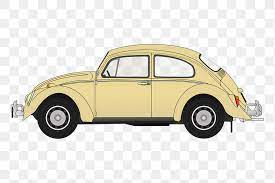

In [42]:
#Click on each Image to extract its corresponding link to download

img_urls = set()
for i in  range(0,10):
    img=imgResults[i]
    try:
        img.click()
        time.sleep(2)
        actual_images = driver.find_elements(by=By.CSS_SELECTOR, value='img.n3VNCb')
        for actual_image in actual_images:
            if actual_image.get_attribute('src') and 'https' in actual_image.get_attribute('src'):
                img_urls.add(actual_image.get_attribute('src'))
    except ElementClickInterceptedException or ElementNotInteractableException as err:
        print(err)

In [45]:
baseDir=os.getcwd()
baseDir = baseDir+"/images"

In [47]:
for i, url in enumerate(img_urls):
    file_name = "{}.jpg".format(i)    
    try:
        image_content = requests.get(url).content

    except Exception as e:
        print(f"ERROR - COULD NOT DOWNLOAD {url} - {e}")

    try:
        image_file = io.BytesIO(image_content)
        image = Image.open(image_file).convert('RGB')
        
        file_path = os.path.join(baseDir, file_name)
        
        with open(file_path, 'wb') as f:
            image.save(f, "JPEG", quality=85)
        print(f"SAVED - {url} - AT: {file_path}")
    except Exception as e:
        print(f"ERROR - COULD NOT SAVE {url} - {e}")

SAVED - https://freesvg.org/img/coupe2.png - AT: /home/bhaskar/Documents/WORK/Sabudh/sabudh sessions repo/web scrapping/images/0.jpg
SAVED - https://c0.wallpaperflare.com/preview/494/368/967/car-concept-vehicle-auto.jpg - AT: /home/bhaskar/Documents/WORK/Sabudh/sabudh sessions repo/web scrapping/images/1.jpg
SAVED - https://upload.wikimedia.org/wikipedia/commons/thumb/f/f0/Car_with_Driver-Silhouette.svg/1221px-Car_with_Driver-Silhouette.svg.png - AT: /home/bhaskar/Documents/WORK/Sabudh/sabudh sessions repo/web scrapping/images/2.jpg
SAVED - https://live.staticflickr.com/4895/46847145421_996d71da17_b.jpg - AT: /home/bhaskar/Documents/WORK/Sabudh/sabudh sessions repo/web scrapping/images/3.jpg
SAVED - https://upload.wikimedia.org/wikipedia/commons/b/b5/Mansory_Kitted_Cars_at_Geneva_2014_%28Ank_Kumar%29_01.jpg - AT: /home/bhaskar/Documents/WORK/Sabudh/sabudh sessions repo/web scrapping/images/4.jpg
SAVED - https://c0.wallpaperflare.com/preview/764/426/400/car-dealership-car-car-showroom-c